## Feature Selection 

http://scikit-learn.org/stable/modules/feature_selection.html#feature-selection

In [1]:
import pandas as pd                         # pandas is a dataframe library
import matplotlib.pyplot as plt             # matplotlib.pyplot plots data
import numpy as np                          # numpy provides N-dim object support

# do ploting inpline instead of in a separate window
%matplotlib inline

df = pd.read_csv(r'training_data.csv') # load the development data

feature_col_names = ['Demo1','Demo2','Demo3','Demo4','Demo5','Demo6','DisHis1','DisHis1Times','DisHis2','DisHis2Times','DisHis3','DisHis3Times','DisHis4','DisHis5','DisHis6','DisHis7','DisStage1','DisStage2','LungFun1','LungFun10','LungFun11','LungFun12','LungFun13','LungFun14','LungFun15','LungFun16','LungFun17','LungFun18','LungFun19','LungFun2','LungFun20','LungFun3','LungFun4','LungFun5','LungFun6','LungFun7','LungFun8','LungFun9','Dis1','Dis1Treat','Dis2','Dis2Times','Dis3','Dis3Times','Dis4','Dis4Treat','Dis5','Dis5Treat','Dis6','Dis6Treat','Dis7','RespQues1','ResQues1a','ResQues1b','ResQues1c','ResQues2a','SmokHis1','SmokHis2','SmokHis3','SmokHis4']

predicated_class_name = ['Flare_Up']

data = df[feature_col_names].values                # predicator feature columns (60 x m)
target = df[predicated_class_name].values

X, y = data, target
X.shape

(1687, 60)

### SELECTING BY UNIVARIATE MEASURES
If you decide to select a variable by its level of association with its target, the class SelectPercentile provides an automatic procedure for keeping only a certain percentage of the best, associated features. The available metrics for association are

#### f_regression: 
        Used only for numeric targets and based on linear regression performance.

#### f_classif:
        Used only for categorical targets and based on the Analysis of Variance (ANOVA) statistical test.

#### chi2:
        Performs the chi-square statistic for categorical targets, which is less sensible to the nonlinear relationship between the predictive variable and its target.

In [2]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression
Selector_f = SelectPercentile(f_regression, percentile=25)
Selector_f.fit(X,y.ravel())
#for n,s in zip(feature_col_names,Selector_f.scores_):
    #print("F-score: %3.2f for feature %s ," % (s,n))

selected_features = []
for n,s in zip(feature_col_names,Selector_f.scores_):
    if(s > 25):
        selected_features.append(n)
        print("F-score: %3.2f for feature %s ," % (s,n))

F-score: 101.38 for feature DisHis1 ,
F-score: 76.57 for feature DisHis1Times ,
F-score: 126.57 for feature DisHis2 ,
F-score: 111.16 for feature DisHis2Times ,
F-score: 158.07 for feature DisHis3 ,
F-score: 82.69 for feature DisHis3Times ,
F-score: 124.14 for feature DisHis4 ,
F-score: 101.38 for feature DisHis5 ,
F-score: 121.82 for feature DisHis6 ,
F-score: 125.38 for feature DisHis7 ,
F-score: 46.66 for feature DisStage1 ,
F-score: 139.24 for feature DisStage2 ,
F-score: 70.87 for feature LungFun1 ,
F-score: 69.70 for feature LungFun12 ,
F-score: 39.59 for feature LungFun13 ,
F-score: 55.85 for feature LungFun14 ,
F-score: 57.22 for feature LungFun3 ,
F-score: 61.49 for feature LungFun4 ,
F-score: 37.31 for feature LungFun7 ,
F-score: 43.49 for feature LungFun8 ,
F-score: 72.96 for feature LungFun9 ,
F-score: 29.46 for feature Dis1Treat ,
F-score: 61.31 for feature Dis2Times ,
F-score: 34.77 for feature Dis3Times ,
F-score: 39.40 for feature Dis4Treat ,
F-score: 53.08 for feature 

### Selected Feature Name from F-Squre

In [3]:
print(selected_features)

['DisHis1', 'DisHis1Times', 'DisHis2', 'DisHis2Times', 'DisHis3', 'DisHis3Times', 'DisHis4', 'DisHis5', 'DisHis6', 'DisHis7', 'DisStage1', 'DisStage2', 'LungFun1', 'LungFun12', 'LungFun13', 'LungFun14', 'LungFun3', 'LungFun4', 'LungFun7', 'LungFun8', 'LungFun9', 'Dis1Treat', 'Dis2Times', 'Dis3Times', 'Dis4Treat', 'Dis5Treat', 'Dis6Treat', 'RespQues1', 'ResQues1a', 'ResQues1b', 'ResQues1c', 'ResQues2a']


In [4]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif
Selector_cif = SelectPercentile(f_classif, percentile=25)
Selector_cif.fit(X,y.ravel())
#for n,s in zip(feature_col_names,Selector_f.scores_):
    #print("F-score: %3.2f for feature %s ," % (s,n))

selected_features_cif = []
for n,s in zip(feature_col_names,Selector_cif.scores_):
    if(s > 25):
        selected_features_cif.append(n)
        print("Classif-score: %3.2f for feature %s ," % (s,n))

Classif-score: 101.38 for feature DisHis1 ,
Classif-score: 76.57 for feature DisHis1Times ,
Classif-score: 126.57 for feature DisHis2 ,
Classif-score: 111.16 for feature DisHis2Times ,
Classif-score: 158.07 for feature DisHis3 ,
Classif-score: 82.69 for feature DisHis3Times ,
Classif-score: 124.14 for feature DisHis4 ,
Classif-score: 101.38 for feature DisHis5 ,
Classif-score: 121.82 for feature DisHis6 ,
Classif-score: 125.38 for feature DisHis7 ,
Classif-score: 46.66 for feature DisStage1 ,
Classif-score: 139.24 for feature DisStage2 ,
Classif-score: 70.87 for feature LungFun1 ,
Classif-score: 69.70 for feature LungFun12 ,
Classif-score: 39.59 for feature LungFun13 ,
Classif-score: 55.85 for feature LungFun14 ,
Classif-score: 57.22 for feature LungFun3 ,
Classif-score: 61.49 for feature LungFun4 ,
Classif-score: 37.31 for feature LungFun7 ,
Classif-score: 43.49 for feature LungFun8 ,
Classif-score: 72.96 for feature LungFun9 ,
Classif-score: 29.46 for feature Dis1Treat ,
Classif-scor

In [5]:
print(selected_features_cif)

['DisHis1', 'DisHis1Times', 'DisHis2', 'DisHis2Times', 'DisHis3', 'DisHis3Times', 'DisHis4', 'DisHis5', 'DisHis6', 'DisHis7', 'DisStage1', 'DisStage2', 'LungFun1', 'LungFun12', 'LungFun13', 'LungFun14', 'LungFun3', 'LungFun4', 'LungFun7', 'LungFun8', 'LungFun9', 'Dis1Treat', 'Dis2Times', 'Dis3Times', 'Dis4Treat', 'Dis5Treat', 'Dis6Treat', 'RespQues1', 'ResQues1a', 'ResQues1b', 'ResQues1c', 'ResQues2a']


### The RFECV class, 
fitting the data, can provide you with information on the number of useful features, point them out to you, and automatically transform the X data, by the method transform, into a reduced variable set

Optimal number of features : 60


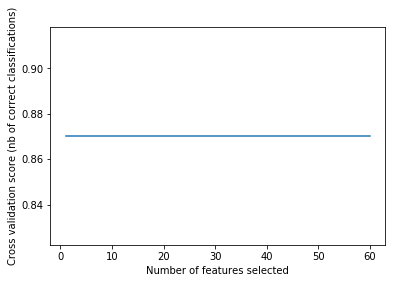

In [6]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y.ravel())

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### Chi-Square Selection

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
X_new.shape


(1687, 20)

### L1-based feature selection

In [8]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

X.shape

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y.ravel())
model_l1 = SelectFromModel(lsvc, prefit=True)
X_newL1 = model_l1.transform(X)

X_newL1.shape


(1687, 4)

### Tree-based feature selection

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier()
clf = clf.fit(X, y.ravel())
clf.feature_importances = feature_col_names
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape  

(1687, 28)